# Movies Investment Prediction using a LRM

Source: Box Office Mojo 
https://www.boxofficemojo.com/

##### Web Scrapping

Let's import our libraries

In [1]:
from bs4 import BeautifulSoup as BS
import requests
from requests import get
from IPython.core.display import display, HTML
import re
import pandas as pd
import numpy as np
from time import sleep
from random import randint
import dateutil.parser


In [2]:
def get_movie_value(soup, field):
    obj = soup.find(text=re.compile(field))
    if not obj:
        return None
    next_element = obj.findNext()
    if next_element:
        return next_element.text
    else:
        return None

In [3]:
def to_date(datestring):
    date = dateutil.parser.parse(datestring)
    return date

In [4]:
#Let's start writing functions to get the values we want

def get_movie_title(soup):
    title_element = soup.find("title")
    if not title_element:
        return None

    title_text = title_element.text
    if "-" in title_text:
        title_parts = title_text.split("-")
        if title_parts.count == 2:
            return title_parts[0].strip()
        else:
            return "-".join(title_parts[0:-1]).strip()
    else:
        return title_text.strip()
 

In [5]:
def get_movie_runtime(soup):
    runtimestring = get_movie_value(soup, "Running")
    try:
        runtime = runtimestring.split()
        minutes = int(runtime[0]) * 60 + int(runtime[2])
        return minutes
    except:
        return None

In [6]:
def get_movie_widest_release(soup):
    widest_release_value = get_movie_value(soup, "Widest Release")
    if not widest_release_value:
        return None
    widest_release_value = widest_release_value.replace(",", "").split(" ")[0]
    widest_release_value = widest_release_value.strip()
    return int(widest_release_value)

In [7]:
def get_movie_domestic_gross(soup):
    moneystring = (soup.find(class_="mojo-performance-summary-table")
        .find_all("span", class_="money")[0].text)
    moneystring = moneystring.replace("$", "").replace(",", "")
    return int(moneystring)



In [8]:
#page.status_code

In [9]:
#urls

In [10]:
#def get_movie_budget(soup)

def get_movie_budget(soup):
    raw_budget = get_movie_value(soup,"Budget")
    try:
        budget = raw_budget.replace("$", "").replace(",", "")
        return int(budget)
    except:
        return None

In [11]:
def get_movie_worldwide_gross(soup):
    moneystring = (soup.find(class_="mojo-performance-summary-table")
        .find_all("span", class_="money")[-1].text)
    moneystring = moneystring.replace("$", "").replace(",", "")
    return int(moneystring)

In [12]:
def get_movie_rating(soup):
    rating_value = get_movie_value(soup, "MPAA")
    if not rating_value:
        return None
    return rating_value.strip()

In [13]:
def get_movie_genres(soup):
    genres_value = get_movie_value(soup, "Genres")
    if not genres_value:
        return None
    genres_value = genres_value.replace('\n    \n       ','')
    return genres_value.strip()

In [14]:
def get_movie_distributor(soup):
    distributor1 = get_movie_value(soup, "Distributor")
    distributor = distributor1.split('See')[0]
    if not distributor:
        return None
    return distributor.strip()

In [15]:
def get_movie_opening_gross(soup):
    element1 = soup.find(
        class_="a-section a-spacing-none mojo-summary-values mojo-hidden-from-mobile"
    )
    if not element1:
        return None
    element2 = element1.find("span", class_="money")
    if not element2:
        return None
    opening = element2.text.replace("$", "").replace(",", "")
    return int(opening)

In [16]:
def get_release_date(soup):
    date = get_movie_value(soup, "Release Date").split('-')[0].split('(')[0].strip()
    date = to_date(date)
    if not date:
        return None
    return date

In [17]:
def get_movie_data(url):
    response = requests.get(url)
    page = response.text
    soup = BS(page, "lxml")
    
    title = get_movie_title(soup)
    budget = get_movie_budget(soup)
    runtime = get_movie_runtime(soup)
    rating = get_movie_rating(soup)
    genres = get_movie_genres(soup)
    distributor1 = get_movie_distributor(soup)
    domestic = get_movie_domestic_gross(soup)
    worldwide = get_movie_worldwide_gross(soup)
    opening = get_movie_opening_gross(soup)
    widest_release = get_movie_widest_release(soup)
    release_date = get_release_date(soup)

    headers = ["title", "budget", "runtime", "rating", "genres", "distributor", "domestic_gross", "worldwide_gross", "opening_gross", "widest_release", "release_date"]
    movie_dict = dict(zip(headers, [title, budget, runtime, rating, genres, distributor1, domestic, worldwide, opening, widest_release, release_date]))
    
    return movie_dict


In [18]:
#Same process but writing a function

def get_movie_urls():
    url = "https://www.boxofficemojo.com/year/2019/?ref_=bo_yl_table_3"
    url2 = "https://www.boxofficemojo.com/year/2018/?ref_=bo_yl_table_4"
    url3 = "https://www.boxofficemojo.com/year/2017/?ref_=bo_yl_table_5"
    url4 = "https://www.boxofficemojo.com/year/2016/?ref_=bo_yl_table_6"
    url5 = "https://www.boxofficemojo.com/year/2015/?ref_=bo_yl_table_7"

    url_list = [url, url2, url3, url4, url5]
    
    all_titles = []
    
    for url in url_list:
        page = requests.get(url)
        soup = BS(page.text, "lxml")
        titles = soup.find_all("td", class_="a-text-left mojo-field-type-release mojo-cell-wide")
        for title in titles:
            all_titles.append("https://www.boxofficemojo.com/" + title.select("a")[0].get("href"))
    return all_titles

In [19]:
urls = get_movie_urls()

In [20]:
#Let's run the data to see if we get any error

count = 1
for url in urls:
    print(f"{count}: {url}")
    movie_data = get_movie_data(url)
    print(movie_data)
    count = count + 1
#   sleep(randint(1, 2))

1: https://www.boxofficemojo.com//release/rl3059975681/?ref_=bo_yld_table_1
{'title': 'Avengers: Endgame', 'budget': 356000000, 'runtime': 181, 'rating': 'PG-13', 'genres': 'Action Adventure Drama Sci-Fi', 'distributor': 'Walt Disney Studios Motion Pictures', 'domestic_gross': 858373000, 'worldwide_gross': 2797501328, 'opening_gross': 357115007, 'widest_release': 4662, 'release_date': datetime.datetime(2019, 4, 26, 0, 0)}
2: https://www.boxofficemojo.com//release/rl3321923073/?ref_=bo_yld_table_2
{'title': 'The Lion King', 'budget': 260000000, 'runtime': 118, 'rating': 'PG', 'genres': 'Adventure Animation Drama Family Musical', 'distributor': 'Walt Disney Studios Motion Pictures', 'domestic_gross': 543638043, 'worldwide_gross': 1656943394, 'opening_gross': 191770759, 'widest_release': 4802, 'release_date': datetime.datetime(2019, 7, 19, 0, 0)}
3: https://www.boxofficemojo.com//release/rl3798500865/?ref_=bo_yld_table_3
{'title': 'Toy Story 4', 'budget': 200000000, 'runtime': 100, 'ratin

In [21]:
movies_list = []   #<- make an empty list
for url in urls:   #<- url list
    movies_list.append(get_movie_data(url))

In [22]:
movies_list

[{'title': 'Avengers: Endgame',
  'budget': 356000000,
  'runtime': 181,
  'rating': 'PG-13',
  'genres': 'Action Adventure Drama Sci-Fi',
  'distributor': 'Walt Disney Studios Motion Pictures',
  'domestic_gross': 858373000,
  'worldwide_gross': 2797501328,
  'opening_gross': 357115007,
  'widest_release': 4662,
  'release_date': datetime.datetime(2019, 4, 26, 0, 0)},
 {'title': 'The Lion King',
  'budget': 260000000,
  'runtime': 118,
  'rating': 'PG',
  'genres': 'Adventure Animation Drama Family Musical',
  'distributor': 'Walt Disney Studios Motion Pictures',
  'domestic_gross': 543638043,
  'worldwide_gross': 1656943394,
  'opening_gross': 191770759,
  'widest_release': 4802,
  'release_date': datetime.datetime(2019, 7, 19, 0, 0)},
 {'title': 'Toy Story 4',
  'budget': 200000000,
  'runtime': 100,
  'rating': 'G',
  'genres': 'Adventure Animation Comedy Family Fantasy',
  'distributor': 'Walt Disney Studios Motion Pictures',
  'domestic_gross': 434038008,
  'worldwide_gross': 107

In [23]:
master_df = pd.DataFrame(movies_list)  #convert list of dict to df
master_df.set_index('title', inplace=True) #indexing by movie title

master_df

budget  runtime  \
title                                                                     
Avengers: Endgame                                  356000000.0    181.0   
The Lion King                                      260000000.0    118.0   
Toy Story 4                                        200000000.0    100.0   
Frozen II                                          150000000.0    103.0   
Captain Marvel                                     160000000.0    123.0   
...                                                        ...      ...   
Truth                                                      NaN    125.0   
Mistress America                                           NaN     84.0   
Pawn Sacrifice                                             NaN    115.0   
The Oscar Nominated Short Films 2015: Live Action          NaN    118.0   
Meru                                                       NaN     90.0   

                                                  rating  \
title                                                      
Avengers: Endgame                                  PG-13   
The Lion King                                         PG   
Toy Story 4                                            G   
Frozen II                                             PG   
Captain Marvel                                     PG-13   
...                                                  ...   
Truth                                                  R   
Mistress America                                       R   
Pawn Sacrifice                                     PG-13   
The Oscar Nominated Short Films 2015: Live Action   None   
Meru                                                   R   

                                                                                              genres  \
title                                                                                                  
Avengers: Endgame                                                      Action Adventure Drama Sci-Fi   
The Lion King                                               Adventure Animation Drama Family Musical   
Toy Story 4                                                Adventure Animation Comedy Family Fantasy   
Frozen II                                          Adventure Animation Comedy Family Fantasy Musical   
Captain Marvel                                                               Action Adventure Sci-Fi   
...                                                                                              ...   
Truth                                                               Biography Drama History Thriller   
Mistress America                                                                        Comedy Drama   
Pawn Sacrifice                                                        Biography Drama Sport Thriller   
The Oscar Nominated Short Films 2015: Live Action                                              Drama   
Meru                                                                               Documentary Sport   

                                                                           distributor  \
title                                                                                    
Avengers: Endgame                                  Walt Disney Studios Motion Pictures   
The Lion King                                      Walt Disney Studios Motion Pictures   
Toy Story 4                                        Walt Disney Studios Motion Pictures   
Frozen II                                          Walt Disney Studios Motion Pictures   
Captain Marvel                                     Walt Disney Studios Motion Pictures   
...                                                                                ...   
Truth                                                           Sony Pictures Classics   
Mistress America                                              Fox Searchlight Pictures   
Pawn Sacrifice                                

In [24]:
master_df.head()

budget  runtime rating  \
title                                            
Avengers: Endgame  356000000.0    181.0  PG-13   
The Lion King      260000000.0    118.0     PG   
Toy Story 4        200000000.0    100.0      G   
Frozen II          150000000.0    103.0     PG   
Captain Marvel     160000000.0    123.0  PG-13   

                                                              genres  \
title                                                                  
Avengers: Endgame                      Action Adventure Drama Sci-Fi   
The Lion King               Adventure Animation Drama Family Musical   
Toy Story 4                Adventure Animation Comedy Family Fantasy   
Frozen II          Adventure Animation Comedy Family Fantasy Musical   
Captain Marvel                               Action Adventure Sci-Fi   

                                           distributor  domestic_gross  \
title                                                                    
Avengers: Endgame  Walt Disney Studios Motion Pictures       858373000   
The Lion King      Walt Disney Studios Motion Pictures       543638043   
Toy Story 4        Walt Disney Studios Motion Pictures       434038008   
Frozen II          Walt Disney Studios Motion Pictures       477373578   
Captain Marvel     Walt Disney Studios Motion Pictures       426829839   

                   worldwide_gross  opening_gross  widest_release release_date  
title                                                                           
Avengers: Endgame       2797501328    357115007.0            4662   2019-04-26  
The Lion King           1656943394    191770759.0            4802   2019-07-19  
Toy Story 4             1073394593    120908065.0            4575   2019-06-21  
Frozen II               1450026933    130263358.0            4440   2019-11-22  
Captain Marvel          1128274794    153433423.0            4310   2019-03-08

In [25]:
master_df.shape

(1000, 10)

In [26]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Avengers: Endgame to Meru
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   budget           596 non-null    float64       
 1   runtime          972 non-null    float64       
 2   rating           949 non-null    object        
 3   genres           1000 non-null   object        
 4   distributor      999 non-null    object        
 5   domestic_gross   1000 non-null   int64         
 6   worldwide_gross  1000 non-null   int64         
 7   opening_gross    992 non-null    float64       
 8   widest_release   1000 non-null   int64         
 9   release_date     1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 85.9+ KB


In [27]:
#calculate international_gross 

#international_gross = master_df["worldwide_gross"] - master_df["domestic_gross"]
#international_gross

In [43]:
#detecting missing values

#Using .isna() for elementwise. True/False values

master_df.isna()

budget  runtime  rating  \
title                                                                        
Avengers: Endgame                                   False    False   False   
The Lion King                                       False    False   False   
Toy Story 4                                         False    False   False   
Frozen II                                           False    False   False   
Captain Marvel                                      False    False   False   
...                                                   ...      ...     ...   
Truth                                               False    False   False   
Mistress America                                    False    False   False   
Pawn Sacrifice                                      False    False   False   
The Oscar Nominated Short Films 2015: Live Action   False    False    True   
Meru                                                False    False   False   

                                                   genres  distributor  \
title                                                                    
Avengers: Endgame                                   False        False   
The Lion King                                       False        False   
Toy Story 4                                         False        False   
Frozen II                                           False        False   
Captain Marvel                                      False        False   
...                                                   ...          ...   
Truth                                               False        False   
Mistress America                                    False        False   
Pawn Sacrifice                                      False        False   
The Oscar Nominated Short Films 2015: Live Action   False        False   
Meru                                                False        False   

                                                   domestic_gross  \
title                                                               
Avengers: Endgame                                           False   
The Lion King                                               False   
Toy Story 4                                                 False   
Frozen II                                                   False   
Captain Marvel                                              False   
...                                                           ...   
Truth                                                       False   
Mistress America                                            False   
Pawn Sacrifice                                              False   
The Oscar Nominated Short Films 2015: Live Action           False   
Meru                                                        False   

                                                   worldwide_gross  \
title                                                                
Avengers: Endgame                                            False   
The Lion King                                                False   
Toy Story 4                                                  False   
Frozen II                                                    False   
Captain Marvel                                               False   
...                                                            ...   
Truth                                                        False   
Mistress America                                             False   
Pawn Sacrifice                                               False   
The Oscar Nominated Short Films 2015: Live Action            False   
Meru                                                         False   

                                                   opening_gross  \
title                                                              
Avengers: Endgame                                          False   
The Lion King                                              F

In [44]:
#using .isna() result as data mask

~master_df.budget.isna() # the “~” is “not”

title
Avengers: Endgame                                    True
The Lion King                                        True
Toy Story 4                                          True
Frozen II                                            True
Captain Marvel                                       True
                                                     ... 
Truth                                                True
Mistress America                                     True
Pawn Sacrifice                                       True
The Oscar Nominated Short Films 2015: Live Action    True
Meru                                                 True
Name: budget, Length: 1000, dtype: bool

In [50]:
mask = (master_df.budget < 0)

In [51]:
mask

title
Avengers: Endgame                                    False
The Lion King                                        False
Toy Story 4                                          False
Frozen II                                            False
Captain Marvel                                       False
                                                     ...  
Truth                                                False
Mistress America                                     False
Pawn Sacrifice                                       False
The Oscar Nominated Short Films 2015: Live Action    False
Meru                                                 False
Name: budget, Length: 1000, dtype: bool

In [53]:
master_df.dtypes

budget                    float64
runtime                   float64
rating                     object
genres                     object
distributor                object
domestic_gross              int64
worldwide_gross             int64
opening_gross             float64
widest_release              int64
release_date       datetime64[ns]
dtype: object

In [38]:
#import datetime
#master_df["formatted_date"] = pd.to_datetime(master_df.release_date, 
#                                            format="%m/%d/%Y %H:%M:%S")

In [39]:
#now, let's split the datetime by season

"""spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
winter = everything else
if doy in spring:
  season = 'spring'
elif doy in summer:
  season = 'summer'
elif doy in fall:
  season = 'fall'
else:
  season = 'winter"""

"spring = range(80, 172)\nsummer = range(172, 264)\nfall = range(264, 355)\nwinter = everything else\nif doy in spring:\n  season = 'spring'\nelif doy in summer:\n  season = 'summer'\nelif doy in fall:\n  season = 'fall'\nelse:\n  season = 'winter'"

In [59]:
#since any movie can have Budget value < 0 we will replace them for the mean value (average)

total_budget = master_df.budget.mean()
master_df.budget.fillna((total_budget), inplace=True)

In [60]:
total_budget

61377265.10067077

In [61]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Avengers: Endgame to Meru
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   budget           1000 non-null   float64       
 1   runtime          972 non-null    float64       
 2   rating           949 non-null    object        
 3   genres           1000 non-null   object        
 4   distributor      999 non-null    object        
 5   domestic_gross   1000 non-null   int64         
 6   worldwide_gross  1000 non-null   int64         
 7   opening_gross    992 non-null    float64       
 8   widest_release   1000 non-null   int64         
 9   release_date     1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 125.9+ KB


In [68]:
#let's drop missing values since they represent around 7% of our data

master_df.dropna(subset=["runtime"], inplace=True) 
master_df.dropna(subset=["rating"], inplace=True)                 
master_df.dropna(subset=["distributor"], inplace=True)                
master_df.dropna(subset=["opening_gross"], inplace=True)                  
            

In [69]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 921 entries, Avengers: Endgame to Meru
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   budget           921 non-null    float64       
 1   runtime          921 non-null    float64       
 2   rating           921 non-null    object        
 3   genres           921 non-null    object        
 4   distributor      921 non-null    object        
 5   domestic_gross   921 non-null    int64         
 6   worldwide_gross  921 non-null    int64         
 7   opening_gross    921 non-null    float64       
 8   widest_release   921 non-null    int64         
 9   release_date     921 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 79.1+ KB


In [70]:
master_df.head()

budget  runtime rating  \
title                                            
Avengers: Endgame  356000000.0    181.0  PG-13   
The Lion King      260000000.0    118.0     PG   
Toy Story 4        200000000.0    100.0      G   
Frozen II          150000000.0    103.0     PG   
Captain Marvel     160000000.0    123.0  PG-13   

                                                              genres  \
title                                                                  
Avengers: Endgame                      Action Adventure Drama Sci-Fi   
The Lion King               Adventure Animation Drama Family Musical   
Toy Story 4                Adventure Animation Comedy Family Fantasy   
Frozen II          Adventure Animation Comedy Family Fantasy Musical   
Captain Marvel                               Action Adventure Sci-Fi   

                                           distributor  domestic_gross  \
title                                                                    
Avengers: Endgame  Walt Disney Studios Motion Pictures       858373000   
The Lion King      Walt Disney Studios Motion Pictures       543638043   
Toy Story 4        Walt Disney Studios Motion Pictures       434038008   
Frozen II          Walt Disney Studios Motion Pictures       477373578   
Captain Marvel     Walt Disney Studios Motion Pictures       426829839   

                   worldwide_gross  opening_gross  widest_release release_date  
title                                                                           
Avengers: Endgame       2797501328    357115007.0            4662   2019-04-26  
The Lion King           1656943394    191770759.0            4802   2019-07-19  
Toy Story 4             1073394593    120908065.0            4575   2019-06-21  
Frozen II               1450026933    130263358.0            4440   2019-11-22  
Captain Marvel          1128274794    153433423.0            4310   2019-03-08

In [78]:
#let's import some libraries we will need moving forward

%pylab inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['get', 'randint']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Linear Regression 

- Be able to visualize data
- Look for correlations and multicollinearity
- Understand how linear regression models work
- Interpret basic regression statistics like $R^2$
- Do basic feature engineering and selection to improve models

In [97]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or svg
%matplotlib inline

In [98]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 921 entries, Avengers: Endgame to Meru
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   budget           921 non-null    float64       
 1   runtime          921 non-null    float64       
 2   rating           921 non-null    object        
 3   genres           921 non-null    object        
 4   distributor      921 non-null    object        
 5   domestic_gross   921 non-null    int64         
 6   worldwide_gross  921 non-null    int64         
 7   opening_gross    921 non-null    float64       
 8   widest_release   921 non-null    int64         
 9   release_date     921 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 119.1+ KB


In [99]:
master_df.head()

budget  runtime rating  \
title                                            
Avengers: Endgame  356000000.0    181.0  PG-13   
The Lion King      260000000.0    118.0     PG   
Toy Story 4        200000000.0    100.0      G   
Frozen II          150000000.0    103.0     PG   
Captain Marvel     160000000.0    123.0  PG-13   

                                                              genres  \
title                                                                  
Avengers: Endgame                      Action Adventure Drama Sci-Fi   
The Lion King               Adventure Animation Drama Family Musical   
Toy Story 4                Adventure Animation Comedy Family Fantasy   
Frozen II          Adventure Animation Comedy Family Fantasy Musical   
Captain Marvel                               Action Adventure Sci-Fi   

                                           distributor  domestic_gross  \
title                                                                    
Avengers: Endgame  Walt Disney Studios Motion Pictures       858373000   
The Lion King      Walt Disney Studios Motion Pictures       543638043   
Toy Story 4        Walt Disney Studios Motion Pictures       434038008   
Frozen II          Walt Disney Studios Motion Pictures       477373578   
Captain Marvel     Walt Disney Studios Motion Pictures       426829839   

                   worldwide_gross  opening_gross  widest_release release_date  
title                                                                           
Avengers: Endgame       2797501328    357115007.0            4662   2019-04-26  
The Lion King           1656943394    191770759.0            4802   2019-07-19  
Toy Story 4             1073394593    120908065.0            4575   2019-06-21  
Frozen II               1450026933    130263358.0            4440   2019-11-22  
Captain Marvel          1128274794    153433423.0            4310   2019-03-08

For our first approach we will be taking only the numerical features and we go from there

In [101]:
master_df.shape

(921, 10)

In [110]:
# let's select some variables for our initial analysis and star building our basic model

smaller_df= master_df.loc[:,["runtime", "budget", "domestic_gross", "worldwide_gross", "opening_gross", "widest_release"]]

In [111]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(smaller_df, height=1.2, plot_kws={'s': 6});

In [112]:
# View the correlations
smaller_df.corr()

runtime    budget  domestic_gross  worldwide_gross  \
runtime          1.000000  0.365312        0.335758         0.354549   
budget           0.365312  1.000000        0.589991         0.659375   
domestic_gross   0.335758  0.589991        1.000000         0.951789   
worldwide_gross  0.354549  0.659375        0.951789         1.000000   
opening_gross    0.319421  0.631216        0.945105         0.922741   
widest_release   0.198699  0.364422        0.588326         0.584607   

                 opening_gross  widest_release  
runtime               0.319421        0.198699  
budget                0.631216        0.364422  
domestic_gross        0.945105        0.588326  
worldwide_gross       0.922741        0.584607  
opening_gross         1.000000        0.580869  
widest_release        0.580869        1.000000

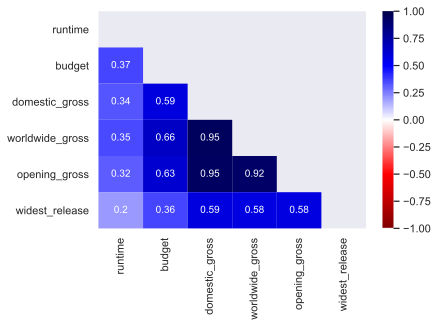

In [113]:
upper = np.triu(smaller_df.corr())  # optionally, you can just look at the lower triangle since it's simetric
sns.heatmap(smaller_df.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper);


The VIF is a measure of how much the variance of the  𝑗 th coefficient is affected by changes in the other predictors. So, if the VIF is 25, the standard error for the coefficient of that predictor variable is  25⎯⎯⎯⎯√=5  times larger than if that predictor variable had 0 correlation with the other predictor variables.

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
def vif(df_X):
    '''
    Calculate the VIF for each feature of df_X (a Pandas DataFrame).
    '''
    vif_data = [variance_inflation_factor(df_X.values, i)
                for i in range(df_X.shape[1])]
    
    return pd.Series(vif_data, index=df_X.columns)

In [116]:
# We only analyze the VIF for predictors
vif(smaller_df.iloc[:, 1:])

budget              3.847835
domestic_gross     23.184791
worldwide_gross    16.860474
opening_gross      13.413226
widest_release      3.216946
dtype: float64

worldwide_gross and opening_gross are both pretty high. Remember, worldwide_gross is very strongly related to Y (domestic_gross) so we'll try to keep it. Let's remove the former pair.

In [118]:
vif(smaller_df[['worldwide_gross', 'opening_gross']])

worldwide_gross    8.976018
opening_gross      8.976018
dtype: float64

Regression with SKLearn

In [119]:
# Create an empty model
lr = LinearRegression()

# Choose just the X1 column for our data
X = smaller_df['worldwide_gross'].values.reshape(-1, 1)

# Choose the response variable
y = smaller_df['domestic_gross']

# Fit the model 
lr.fit(X, y)

LinearRegression()

### (Adjusted) R-Squared

In [121]:
lr.score(X, y)

0.9059029567160326

**The typical scoring metric for regression is the $R^2$ score, or the Coefficient of Determination.**

In [122]:
#Create the model
model = sm.OLS(y, sm.add_constant(X)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     8848.
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        01:02:50   Log-Likelihood:                -17281.
No. Observations:                 921   AIC:                         3.457e+04
Df Residuals:                     919   BIC:                         3.457e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.222e+06   1.32e+06      5.486      0.000    4.64e+06    9.81e+06
x1             0.3534      0.004     94.061      0.000       0.346       0.361
==============================================================================
Omnibus:                      193.498   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4850.099
Skew:                           0.251   Prob(JB):                         0.00
Kurtosis:                      14.231   Cond. No.                     4.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
import scipy.stats as stats

In [125]:
def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

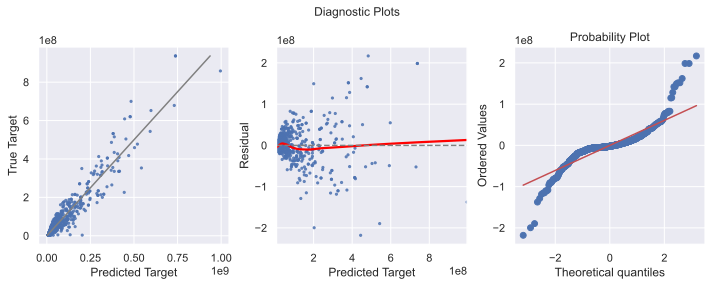

In [126]:
diagnostic_plots(fit.fittedvalues, y, fit.resid)

In [71]:
# Let's get rid on the Categorical Variables

pd.get_dummies(master_df['rating']).head()

G  Not Rated  PG  PG-13  R
title                                        
Avengers: Endgame  0          0   0      1  0
The Lion King      0          0   1      0  0
Toy Story 4        1          0   0      0  0
Frozen II          0          0   1      0  0
Captain Marvel     0          0   0      1  0

Feature Engineering 

In [74]:
# let's select some variables for our initial analysis and star building our basic model

smaller_df= master_df.loc[:,["budget", "runtime", "domestic_gross", "worldwide_gross", "opening_gross", "widest_release"]]

In [75]:
smaller_df.describe()

budget     runtime  domestic_gross  worldwide_gross  \
count  9.210000e+02  921.000000    9.210000e+02     9.210000e+02   
mean   6.150163e+07  110.825190    7.168484e+07     1.824244e+08   
std    4.867046e+07   16.731539    1.111221e+08     2.993047e+08   
min    1.000000e+05   76.000000    2.313596e+06     2.334228e+06   
25%    3.000000e+07   98.000000    1.111402e+07     2.217978e+07   
50%    6.137727e+07  109.000000    3.307827e+07     6.419152e+07   
75%    6.137727e+07  121.000000    7.921338e+07     1.953333e+08   
max    3.560000e+08  181.000000    9.366622e+08     2.797501e+09   

       opening_gross  widest_release  
count   9.210000e+02      921.000000  
mean    2.085524e+07     2547.376764  
std     3.604757e+07     1217.869748  
min     2.284900e+04      106.000000  
25%     1.763070e+06     1566.000000  
50%     9.129999e+06     2822.000000  
75%     2.269274e+07     3508.000000  
max     3.571150e+08     4802.000000

In [76]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 921 entries, Avengers: Endgame to Meru
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           921 non-null    float64
 1   runtime          921 non-null    float64
 2   domestic_gross   921 non-null    int64  
 3   worldwide_gross  921 non-null    int64  
 4   opening_gross    921 non-null    float64
 5   widest_release   921 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 50.4+ KB


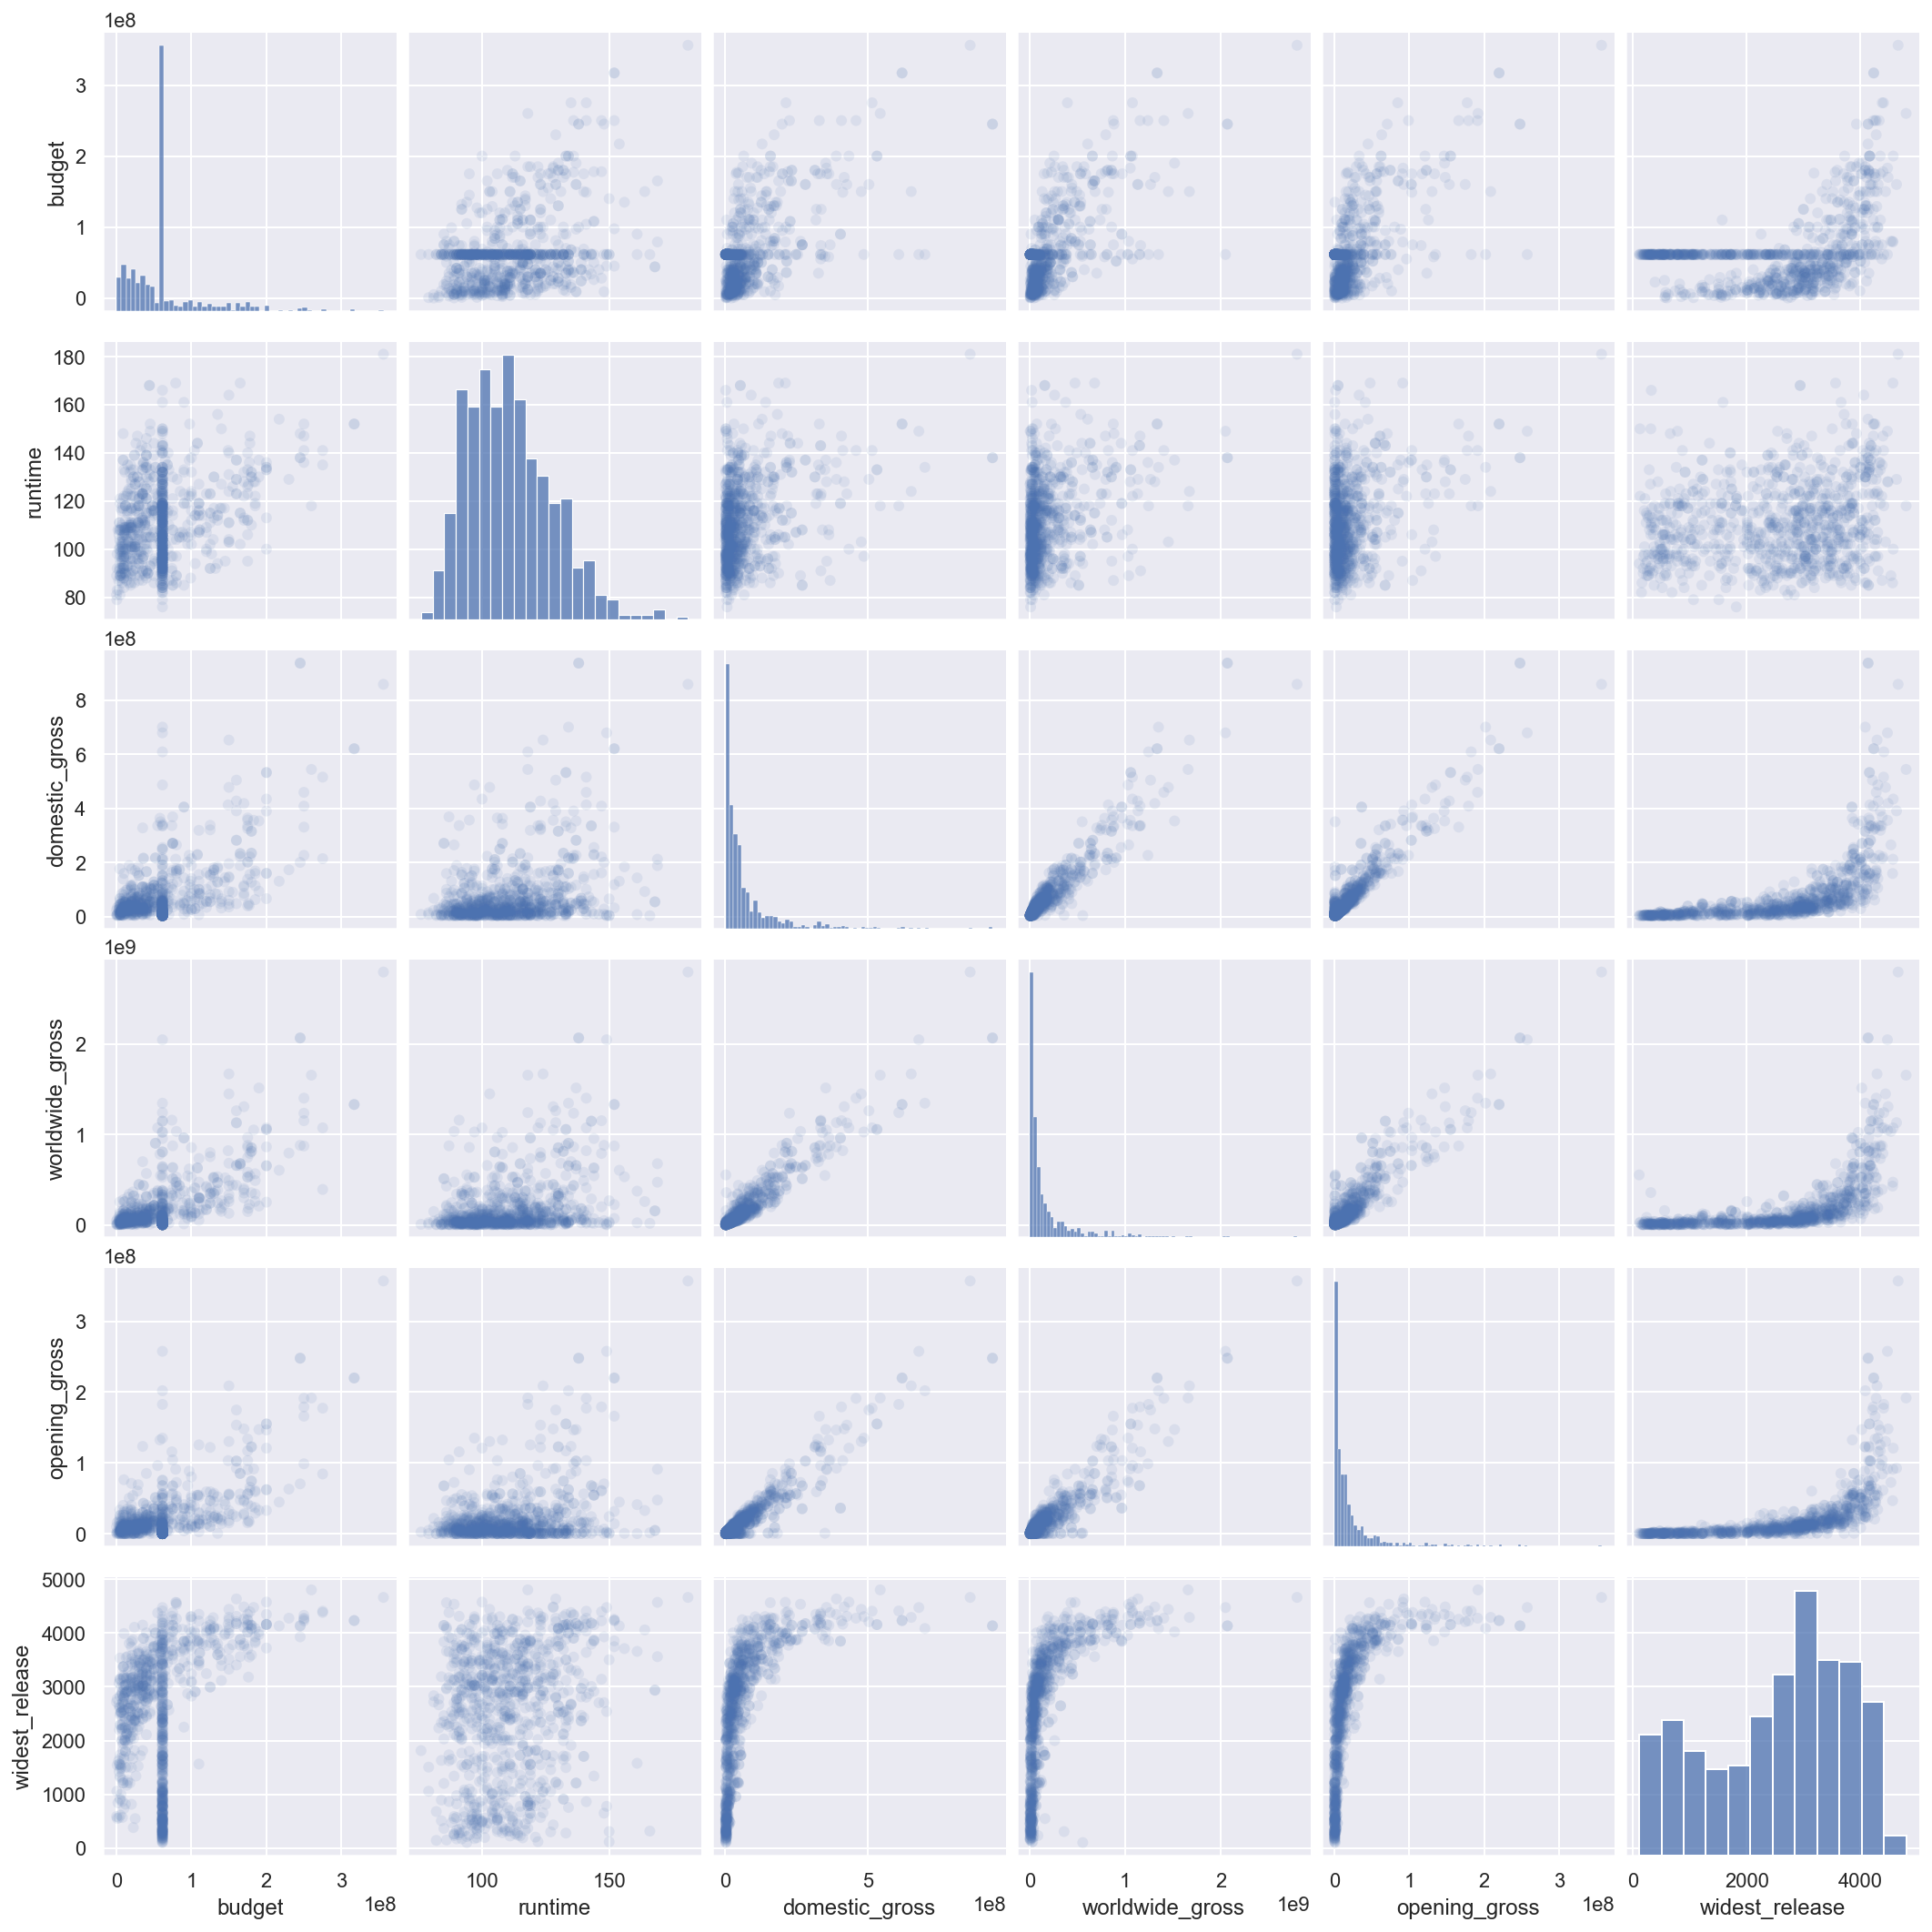

In [79]:
sns.pairplot(smaller_df[:1000], plot_kws=dict(alpha=.1, edgecolor='none'))

In [ ]:
#Setting up for modeling and building a baseline

In [80]:
##Separate our features from our target

X = smaller_df.loc[:,["budget", "runtime", "worldwide_gross", "opening_gross", "widest_release"]]

y = smaller_df["domestic_gross"]

In [81]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 921 entries, Avengers: Endgame to Meru
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           921 non-null    float64
 1   runtime          921 non-null    float64
 2   worldwide_gross  921 non-null    int64  
 3   opening_gross    921 non-null    float64
 4   widest_release   921 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 43.2+ KB


In [ ]:
##

In [86]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

In [87]:
split_and_validate(X, y)


Validation R^2 score was: 0.9308493141431209
Feature coefficient results: 

budget : -0.20
runtime : 82663.52
worldwide_gross : 0.22
opening_gross : 1.33
widest_release : 1448.16


In [ ]:
#Basic feature engineering: adding polynomial terms

In [94]:
X2 = X.copy()

X2['WR2'] = X2["widest_release"] ** 2
X2['OP2'] = X2[ "opening_gross"] ** 2


split_and_validate(X2, y)


Validation R^2 score was: 0.931869475424769
Feature coefficient results: 

budget : -0.20
runtime : 83105.10
worldwide_gross : 0.22
opening_gross : 1.42
widest_release : 2458.68
WR2 : -0.44
OP2 : -0.00
